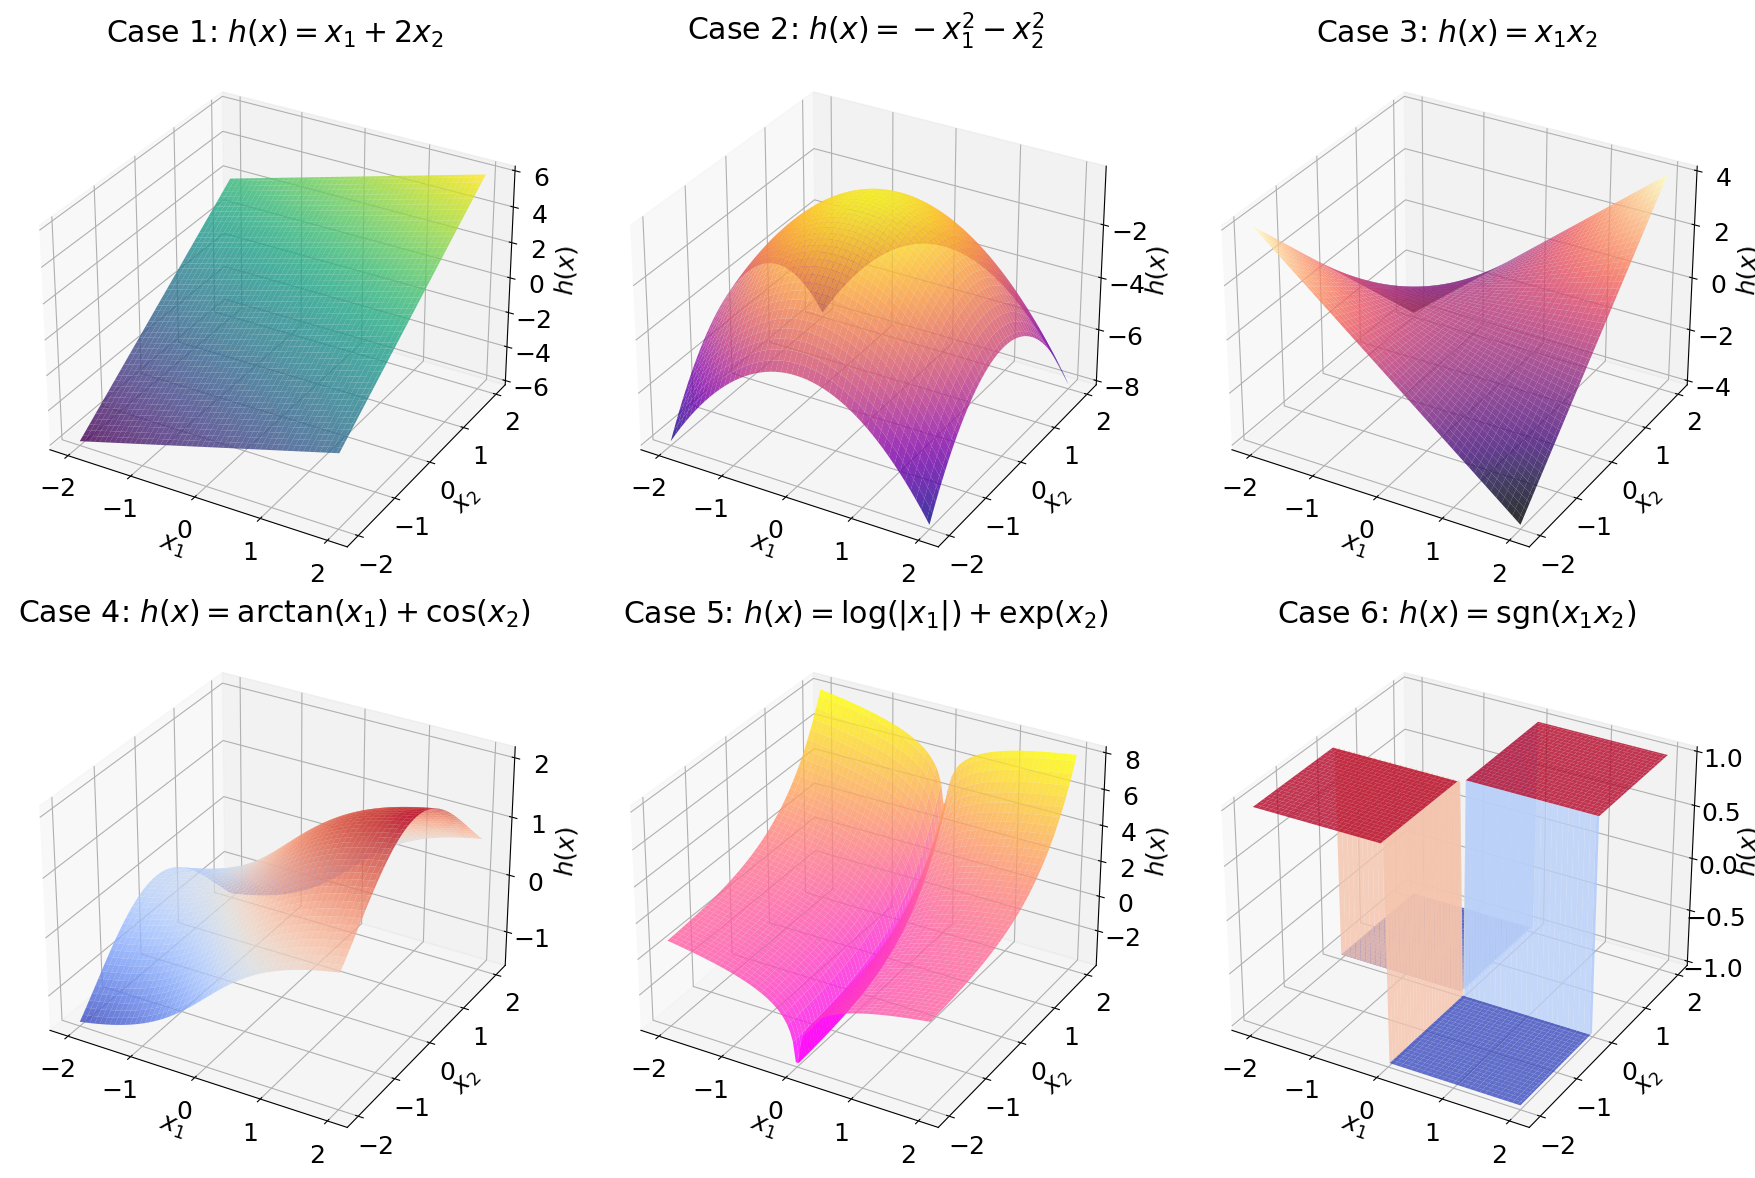

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

# 创建图形和子图
plt.rcParams['font.size'] = 18
fig = plt.figure(figsize=(18, 12))

# 生成网格数据
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Case 1: h(x) = x1 + 2x2
ax1 = fig.add_subplot(231, projection='3d')
Z1 = X + 2*Y
surf1 = ax1.plot_surface(X, Y, Z1, cmap=cm.viridis, alpha=0.8)
ax1.set_title('Case 1: $h(x) = x_1 + 2x_2$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$h(x)$')

# Case 2: h(x) = -x1² - x2²
ax2 = fig.add_subplot(232, projection='3d')
Z2 = -X**2 - Y**2
surf2 = ax2.plot_surface(X, Y, Z2, cmap=cm.plasma, alpha=0.8)
ax2.set_title('Case 2: $h(x) = -x_1^2 - x_2^2$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$h(x)$')

# Case 3: h(x) = x1x2
ax3 = fig.add_subplot(233, projection='3d')
Z3 = X * Y
surf3 = ax3.plot_surface(X, Y, Z3, cmap=cm.magma, alpha=0.8)
ax3.set_title('Case 3: $h(x) = x_1x_2$')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$h(x)$')

# Case 4: h(x) = arctan(x1) + cos(x2)
ax4 = fig.add_subplot(234, projection='3d')
Z4 = np.arctan(X) + np.cos(Y)
surf4 = ax4.plot_surface(X, Y, Z4, cmap=cm.coolwarm, alpha=0.8)
ax4.set_title('Case 4: $h(x) = \\arctan(x_1) + \\cos(x_2)$')
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
ax4.set_zlabel('$h(x)$')

# Case 5: h(x) = log(|x1|) + exp(x2)
ax5 = fig.add_subplot(235, projection='3d')
# 处理x1=0的情况，避免log(0)
X_abs = np.abs(X)
X_abs[X_abs == 0] = 1e-10  # 将0替换为很小的正数
Z5 = np.log(X_abs) + np.exp(Y)
surf5 = ax5.plot_surface(X, Y, Z5, cmap=cm.spring, alpha=0.8)
ax5.set_title('Case 5: $h(x) = \\log(|x_1|) + \\exp(x_2)$')
ax5.set_xlabel('$x_1$')
ax5.set_ylabel('$x_2$')
ax5.set_zlabel('$h(x)$')

# Case 6: h(x) = sgn(x1x2)
ax6 = fig.add_subplot(236, projection='3d')
Z6 = np.sign(X * Y)
surf6 = ax6.plot_surface(X, Y, Z6, cmap=cm.coolwarm, alpha=0.8)
ax6.set_title('Case 6: $h(x) = \\operatorname{sgn}(x_1x_2)$')
ax6.set_xlabel('$x_1$')
ax6.set_ylabel('$x_2$')
ax6.set_zlabel('$h(x)$')

# 调整布局
plt.tight_layout()
# plt.show()
plt.savefig('C:/Users/Administrator/Desktop/pycox-master/examples/TranSurv/2025.08.28/function_image-2025.09.12.pdf')

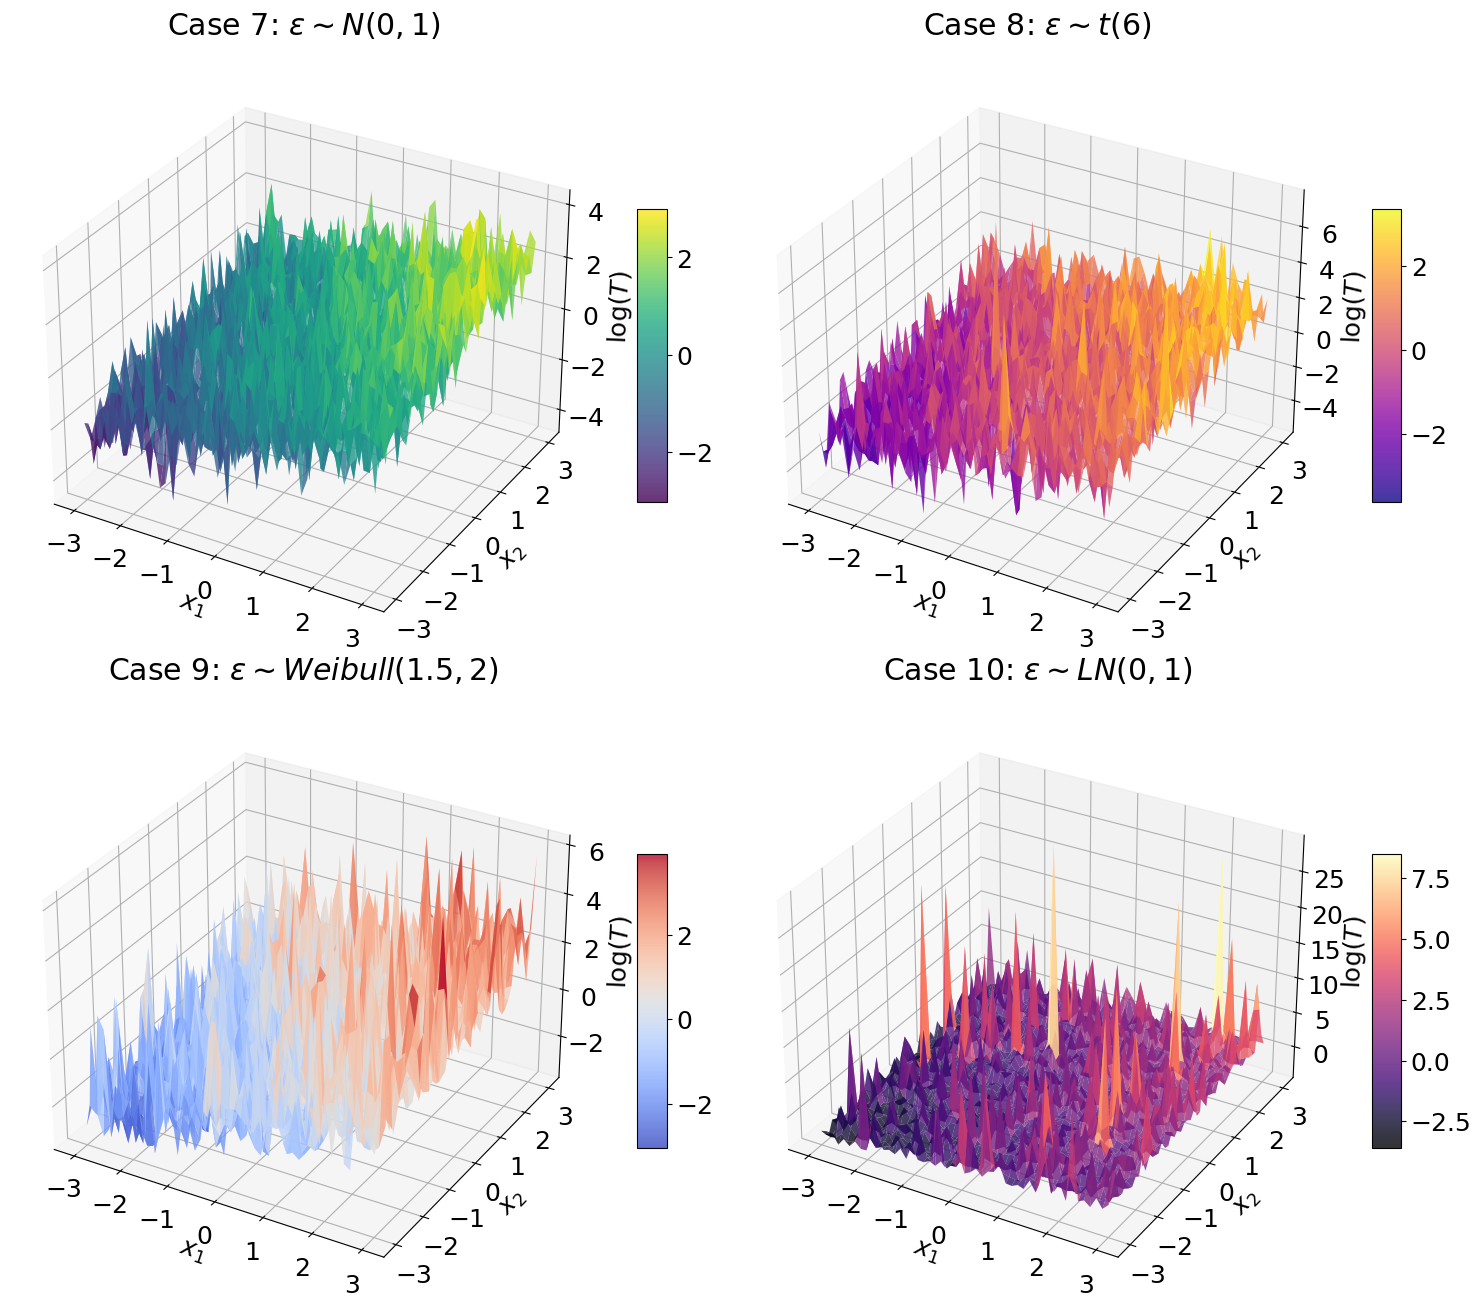

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, t, weibull_min, lognorm

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 创建网格数据
plt.rcParams['font.size'] = 18
x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 50)
X1, X2 = np.meshgrid(x1, x2)

# 计算确定性部分
log_T_deterministic = 0.5 * X1 + 0.3 * X2

# 创建图形
fig = plt.figure(figsize=(20, 16))

# Case 1: 标准正态分布 ε ~ N(0,1)
ax1 = fig.add_subplot(221, projection='3d')
epsilon1 = np.random.normal(0, 1, X1.shape)
log_T1 = log_T_deterministic + epsilon1
surf1 = ax1.plot_surface(X1, X2, log_T1, cmap=cm.viridis, alpha=0.8, linewidth=0, antialiased=True)
ax1.set_title('Case 7: $\epsilon \sim N(0,1)$', pad=20)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$\log(T)$')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

# Case 2: t分布 ε ~ t(6)
ax2 = fig.add_subplot(222, projection='3d')
epsilon2 = t.rvs(6, size=X1.shape)
log_T2 = log_T_deterministic + epsilon2
surf2 = ax2.plot_surface(X1, X2, log_T2, cmap=cm.plasma, alpha=0.8, linewidth=0, antialiased=True)
ax2.set_title('Case 8: $\epsilon \sim t(6)$', pad=20)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$\log(T)$')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

# Case 3: Weibull分布 ε ~ Weibull(1.5, 2) 经过中心化处理
ax3 = fig.add_subplot(223, projection='3d')
# 生成Weibull分布并中心化
epsilon3_original = weibull_min.rvs(1.5, scale=2, size=X1.shape)
epsilon3_mean = weibull_min.mean(1.5, scale=2)
epsilon3 = epsilon3_original - epsilon3_mean  # 中心化处理
log_T3 = log_T_deterministic + epsilon3
surf3 = ax3.plot_surface(X1, X2, log_T3, cmap=cm.coolwarm, alpha=0.8, linewidth=0, antialiased=True)
ax3.set_title('Case 9: $\epsilon \sim Weibull(1.5,2)$', pad=20)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$\log(T)$')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=10)

# Case 4: 对数正态分布 ε ~ LN(0,1) 经过中心化处理
ax4 = fig.add_subplot(224, projection='3d')
# 生成对数正态分布并中心化
epsilon4_original = lognorm.rvs(1, size=X1.shape)  # s=1 对应 LN(0,1)
epsilon4_mean = lognorm.mean(1)  # LN(0,1)的均值
epsilon4 = epsilon4_original - epsilon4_mean  # 中心化处理
log_T4 = log_T_deterministic + epsilon4
surf4 = ax4.plot_surface(X1, X2, log_T4, cmap=cm.magma, alpha=0.8, linewidth=0, antialiased=True)
ax4.set_title('Case 10: $\epsilon \sim LN(0,1)$', pad=20)
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
ax4.set_zlabel('$\log(T)$')
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=10)

# 调整子图间距
plt.subplots_adjust(
    wspace=-0.1,     # 子图之间的水平间距从0.2增加到0.3
    hspace=0.1      # 子图之间的垂直间距从0.2增加到0.3
)
plt.savefig('C:/Users/Administrator/Desktop/pycox-master/examples/TranSurv/2025.08.28/AFT_image_2025.09.15.pdf')